In [14]:
import numpy as np
from read_dataset import read_dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from displayData import displayData
from randInitializeWeights import randInitializeWeights
from unroll_params import unroll_params
from roll_params import roll_params
from scipy.optimize import *
from predict import predict
from backwards import backwards
from checkNNGradients import checkNNGradients
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient
from debugInializeWeights import debugInitializeWeights
from costFunction import costFunction
from unroll_params import unroll_params

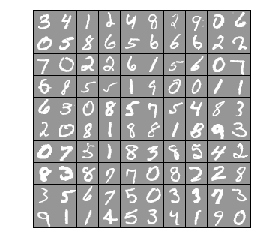

In [15]:
#Reading of the dataset
# You are free to reduce the number of samples retained for training, in order to reduce the computational cost
size_training = 60000     # number of samples retained for training
size_test     = 10000     # number of samples retained for testing
images_training, labels_training, images_test, labels_test = read_dataset(size_training, size_test)

# Randomly select 100 data points to display
random_instances = list(range(size_training))
random.shuffle(random_instances)
displayData(images_training[random_instances[0:100],:])

In [16]:
# Setup the parameters you will use for this exercise
input_layer_size   = 784        # 28x28 Input Images of Digits
num_labels         = 10         # 10 labels, from 0 to 9 (one label for each digit) 

num_of_hidden_layers = int(input('Please select the number of hidden layers: '))
print("\n")

layers = [input_layer_size]
for i in range(num_of_hidden_layers):
    layers = layers + [int(input('Please select the number nodes for the ' + str(i+1) + ' hidden layers: '))]
layers = layers + [num_labels]

Please select the number of hidden layers: 1


Please select the number nodes for the 1 hidden layers: 100


In [28]:
def checkNNCost(lambd):

    input_layer_size  = 3;
    hidden_layer_size = 5;
    num_labels = 3;
    m          = 6;
    layers     = [3, 5, 3]
    
    Theta = [] 
    Theta.append(debugInitializeWeights(hidden_layer_size, input_layer_size))
    Theta.append(debugInitializeWeights(num_labels, hidden_layer_size))
    nn_params = unroll_params(Theta)
    
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = remainder(arange(m)+1, num_labels)
 
    cost = costFunction(nn_params, layers, X, y, num_labels, lambd)
    print('Cost: ' + str(cost))

In [47]:
def costFunction(nn_weights, layers, X, y, num_labels, lambd):
    # Computes the cost function of the neural network.
    # nn_weights: Neural network parameters (vector)
    # layers: a list with the number of units per layer.
    # X: a matrix where every row is a training example for a handwritten digit image
    # y: a vector with the labels of each instance
    # num_labels: the number of units in the output layer
    # lambd: regularization factor
    
    # Setup some useful variables
    m = X.shape[0]
    num_layers = len(layers)

    # Unroll Params
    Theta = roll_params(nn_weights, layers)
    
    # You need to return the following variables correctly 
    J = 0
    
    # ================================ TODO ================================
    # The vector y passed into the function is a vector of labels
    # containing values from 1..K. You need to map this vector into a 
    # binary vector of 1's and 0's to be used with the neural network
    # cost function.
    yv = np.zeros((num_labels, m))
    for i in range(len(y)):
        yv[int(y[i])] = 1  # TODO: the int conversion is maybe not the useful

    yv = np.transpose(yv)
    
    # ================================ TODO ================================
    # In this point calculate the cost of the neural network (feedforward)
    x = np.copy(X)

    for i in range(num_layers-1):
        print("shape of x")
        print(np.shape(x))
        
        s = np.shape(Theta[i])
        theta = Theta[i][:, 0:s[1]-1]
        x = np.dot(x, np.transpose(theta))
        x = x + Theta[i][:, s[1]-1]
        x = sigmoid(x)

    J = (yv*np.log(x)-(1-yv)*np.log(1-x))/m

    print(np.shape(J))
    
    return J

In [48]:
lambd = 0.0
checkNNCost(lambd)

shape of x
(6, 3)
shape of x
(6, 5)
(6, 3)
Cost: [[-0.11720921 -0.11795902 -0.11851605]
 [-0.11724124 -0.11798671 -0.11853713]
 [-0.11721082 -0.11796147 -0.11851916]
 [-0.11723903 -0.11798376 -0.11853367]
 [-0.1172136  -0.11796488 -0.11852291]
 [-0.11723574 -0.11797998 -0.1185297 ]]
